In [1]:
import pandas as pd
import numpy as np
import keras.backend as K
import matplotlib.pyplot as plt
from scipy.misc import imshow
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

from keras.models import model_from_json

%matplotlib inline




Using TensorFlow backend.


In [2]:

data = pd.read_csv("training.csv")
data = data.dropna()
data['Image'] = data['Image'].apply(lambda x: list(map(int, x.split(" "))))

data['Image'] = data['Image'].apply(lambda x: np.reshape(np.array(x), (96,96,1)))


In [3]:
X = list(data['Image'])
X = np.array(X).astype('float32')
print(X.shape)


y = data.drop('Image', axis=1).as_matrix().astype('float32')
print(y.shape)


X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.15)
print(y_test.shape)

(2140, 96, 96, 1)
(2140, 30)
(321, 30)


In [4]:
input_shape = (96, 96, 1)
num_classes = 30
batch_size = 128
epochs = 300


model = Sequential()
#Block 1
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='linear'))



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 96, 96, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 73728)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4718656   
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1950      
Total params: 4,730,174.0
Trainable params: 4,730,174.0
Non-trainable params: 0.0
____________________________________________________________

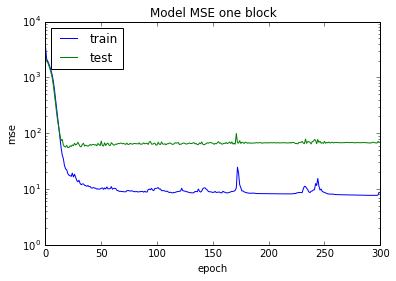

In [5]:
model.compile(loss='mean_squared_error',
              optimizer='Adam',
              metrics=['mse'])
model.summary()



history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(X_test, y_test))

plt.figure()
ax = plt.gca()
ax.set_yscale("log")

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model MSE one block')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [6]:
input_shape = (96, 96, 1)
num_classes = 30



model = Sequential()
#Block 1
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))


#Block 2
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='linear'))



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 96, 96, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 36864)             0         
__________

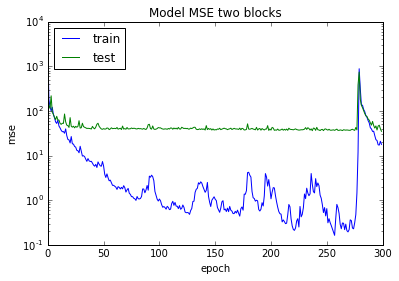

In [7]:
model.compile(loss='mean_squared_error',
              optimizer='Adam',
              metrics=['mse'])
model.summary()



history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(X_test, y_test))

plt.figure()
ax = plt.gca()
ax.set_yscale("log")

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model MSE two blocks')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [8]:
input_shape = (96, 96, 1)
num_classes = 30



model = Sequential()
#Block 1
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))


#Block 2
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))


#Block 3
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))


model.add(Flatten())
model.add(Dense(254, activation='relu'))
model.add(Dense(num_classes, activation='linear'))



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 96, 96, 32)        320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 128)       73856     
__________

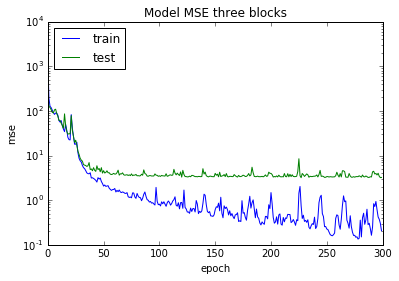

In [9]:
model.compile(loss='mean_squared_error',
              optimizer='Adam',
              metrics=['mse'])
model.summary()


history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(X_test, y_test))

plt.figure()
ax = plt.gca()
ax.set_yscale("log")

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model MSE three blocks')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [10]:

model = Sequential()
#Block 1
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(Dropout(0.1))

#Block 2
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(Dropout(0.1))

#Block 3
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='linear'))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 96, 96, 32)        320       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 48, 48, 64)        18496     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 24, 24, 64)        0         
__________

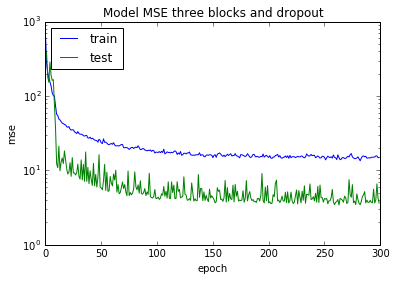

In [11]:
model.compile(loss='mean_squared_error',
              optimizer='Adam',
              metrics=['mse'])
model.summary()


history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(X_test, y_test))

plt.figure()
ax = plt.gca()
ax.set_yscale("log")

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model MSE three blocks and dropout')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
